In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

TFTModel.py         checkpoints         figures             requirements.txt
TFTModelDEV.py      config.json         inference.py        test.npy
Untitled.ipynb      data                main.py
__pycache__         data_manager.py     param_manager.py
attention.json      data_preparation.py prepareData_main.py


In [8]:
test = np.load("test.npy", allow_pickle=True)

In [14]:
test = test[()]

In [15]:
test.keys()

dict_keys(['static_flags', 'historical_flags', 'future_flags', 'decoder_self_attn'])

In [17]:
len(test['decoder_self_attn'])

747

In [170]:
decoder = np.concatenate(test['decoder_self_attn'], axis=1)

In [171]:
decoder.shape

(4, 47795, 28, 28)

In [172]:
decoder = decoder.mean(axis=0)

In [173]:
decoder.shape

(47795, 28, 28)

In [174]:
decoder.shape

(47795, 28, 28)

In [175]:
import matplotlib.pyplot as plt

In [176]:
decoder.shape

(47795, 28, 28)

In [77]:
dc = decoder.mean(axis=0)

In [78]:
dc.shape

(28, 28)

In [177]:
quantiles = np.quantile(decoder,[.3,.5,.7], axis=0)

In [178]:
quantiles.shape

(3, 28, 28)

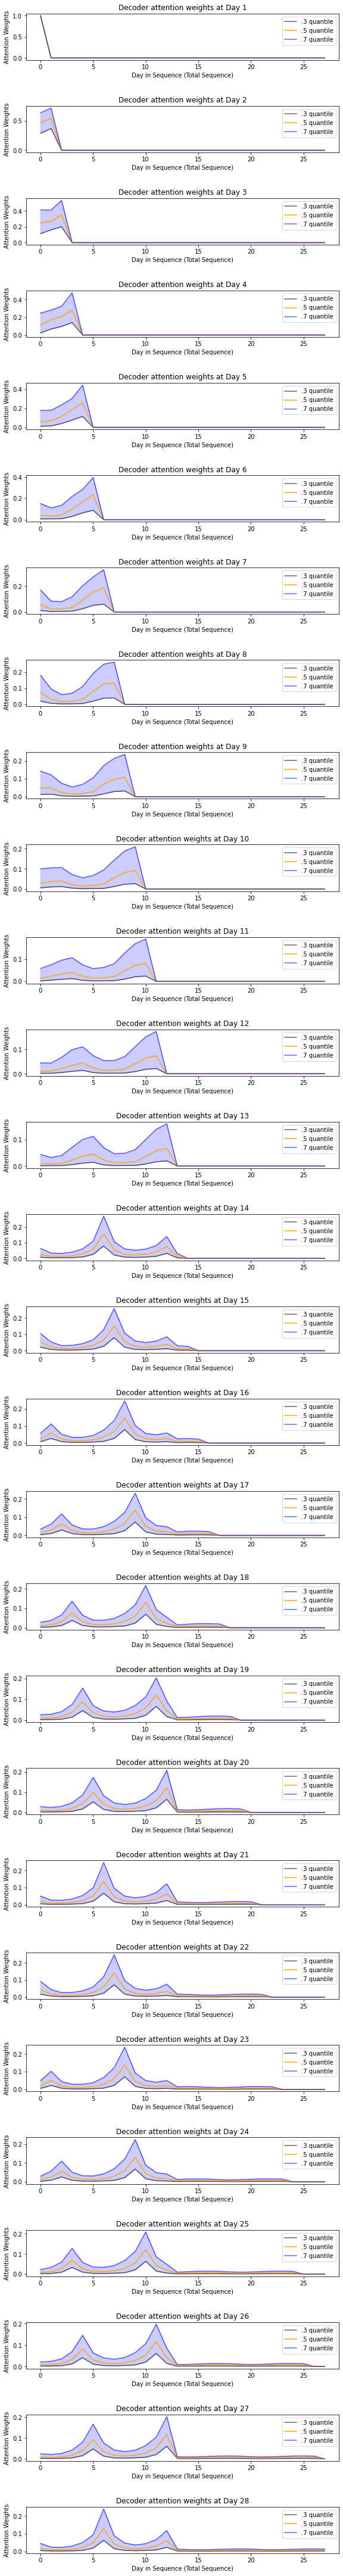

In [179]:
N = 28
X = np.arange(N)

fig, ax = plt.subplots(N, figsize=(8,60))
for i in range(N):
    ax[i].plot(quantiles[0,i], color='black', label='.3 quantile', alpha=.6)
    ax[i].plot(quantiles[1,i], color='orange', label='.5 quantile')
    ax[i].plot(quantiles[2,i], color='blue', label='.7 quantile', alpha=.6)
    ax[i].fill_between(X, quantiles[0,i], quantiles[2,i], color='blue',alpha=.2)
    ax[i].set_title('Decoder attention weights at Day ' + str(i+1))
    ax[i].set_xlabel('Day in Sequence (Total Sequence)')
    ax[i].set_ylabel('Attention Weights')
    ax[i].legend()
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3)
plt.savefig('test.pdf', dpi='figure', bbox_inches='tight')

In [114]:
test.keys()

dict_keys(['static_flags', 'historical_flags', 'future_flags', 'decoder_self_attn'])

In [135]:
hf = np.concatenate(test['historical_flags'],axis=0)

hf = hf.mean(axis=1)

hf.shape

hf_qt = np.quantile(hf, [.3,.5,.7], axis=0)

In [140]:
hf_qt.shape

(3, 15)

In [146]:
!ls

AttentionWeights.ipynb data                   param_manager.py
TFTModel.py            data_manager.py        prepareData_main.py
__pycache__            data_preparation.py    requirements.txt
attention.json         figures                test.npy
checkpoints            inference.py           test.pdf
config.json            main.py


In [147]:
df = pd.read_csv('data/TestData.csv')

In [149]:
df.shape

(49928, 25)

In [151]:
pd.set_option('max_columns',None)

In [152]:
df.head()

,FIPS,Date,Cases,Name,AgeDist,AirPollution,Comorbidities,HealthDisp,Mobility,ResidentialDense,DiseaseSpread,SocialDist,Testing,Transmission,VaccinationOne,VaccinationFull,TimeFromStart,LinearSpace,Constant,LinearTime,P2Time,P3Time,P4Time,CosWeekly,SinWeekly
0,1031,2020-03-01,0.0,"Alabama, Coffee",0.482809,0.806122,0.456746,0.463941,0.649720,0.163959,0.0,1.000,0.000000,0.0,0.0,0.0,0,0.000000,0.5,0.0,1.0,-1.0,1.0,0.62349,-0.781831
1,6035,2020-03-01,0.0,"California, Lassen",0.227216,0.448980,0.503165,0.494431,0.202744,0.720511,0.0,0.675,0.504366,0.0,0.0,0.0,0,0.000318,0.5,0.0,1.0,-1.0,1.0,0.62349,-0.781831
2,6045,2020-03-01,0.0,"California, Mendocino",0.764751,0.591837,0.192125,0.569578,0.571937,0.856932,0.0,0.750,0.504366,0.0,0.0,0.0,0,0.000637,0.5,0.0,1.0,-1.0,1.0,0.62349,-0.781831
3,8045,2020-03-01,0.0,"Colorado, Garfield",0.097966,0.214286,0.000000,0.313119,0.620648,0.585144,0.0,0.750,0.888141,0.0,0.0,0.0,0,0.000955,0.5,0.0,1.0,-1.0,1.0,0.62349,-0.781831
4,13149,2020-03-01,0.0,"Georgia, Heard",0.475076,0.795918,0.647529,0.719674,0.186715,0.559295,0.0,0.750,1.000000,0.0,0.0,0.0,0,0.001273,0.5,0.0,1.0,-1.0,1.0,0.62349,-0.781831


In [153]:
p0 = ["AgeDist","AirPollution","Comorbidities","HealthDisp",
                                                       "Mobility", "ResidentialDense","DiseaseSpread", "SocialDist", "Testing",
                                                       "Transmission", "VaccinationOne", "VaccinationFull"]

In [154]:
p1 = ["AgeDist","AirPollution","Comorbidities","HealthDisp","Mobility","ResidentialDense"]

In [155]:
[f for f in p0 if f not in p1] + 

['DiseaseSpread',
 'SocialDist',
 'Testing',
 'Transmission',
 'VaccinationOne',
 'VaccinationFull']

In [160]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

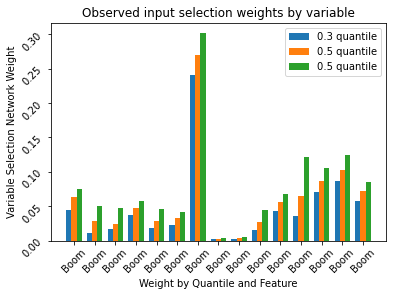

In [161]:
N = 15
X = np.arange(N)
width = 0.25 # -.375 -.25 -.125 / -.125 0 .125 / .125 .25 .375

fig, ax = plt.subplots()
rects1 = ax.bar(X-width, hf_qt[0], width, label='0.3 quantile')
rects2 = ax.bar(X, hf_qt[1], width, label='0.5 quantile')
rects2 = ax.bar(X+width, hf_qt[2], width, label='0.5 quantile')
ax.set_ylabel('Variable Selection Network Weight')
ax.set_xlabel('Weight by Quantile and Feature')
ax.set_title('Observed input selection weights by variable')
ax.set_xticks(X, ['Boom'] * len(X))
ax.tick_params(labelrotation=45)
plt.legend()
plt.show();
# ax.set_xticks(X, )


/var/folders/nq/ydw8sbmd0492r2npkdsbqqvc0000gn/T/ipykernel_85106/2330271167.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3)


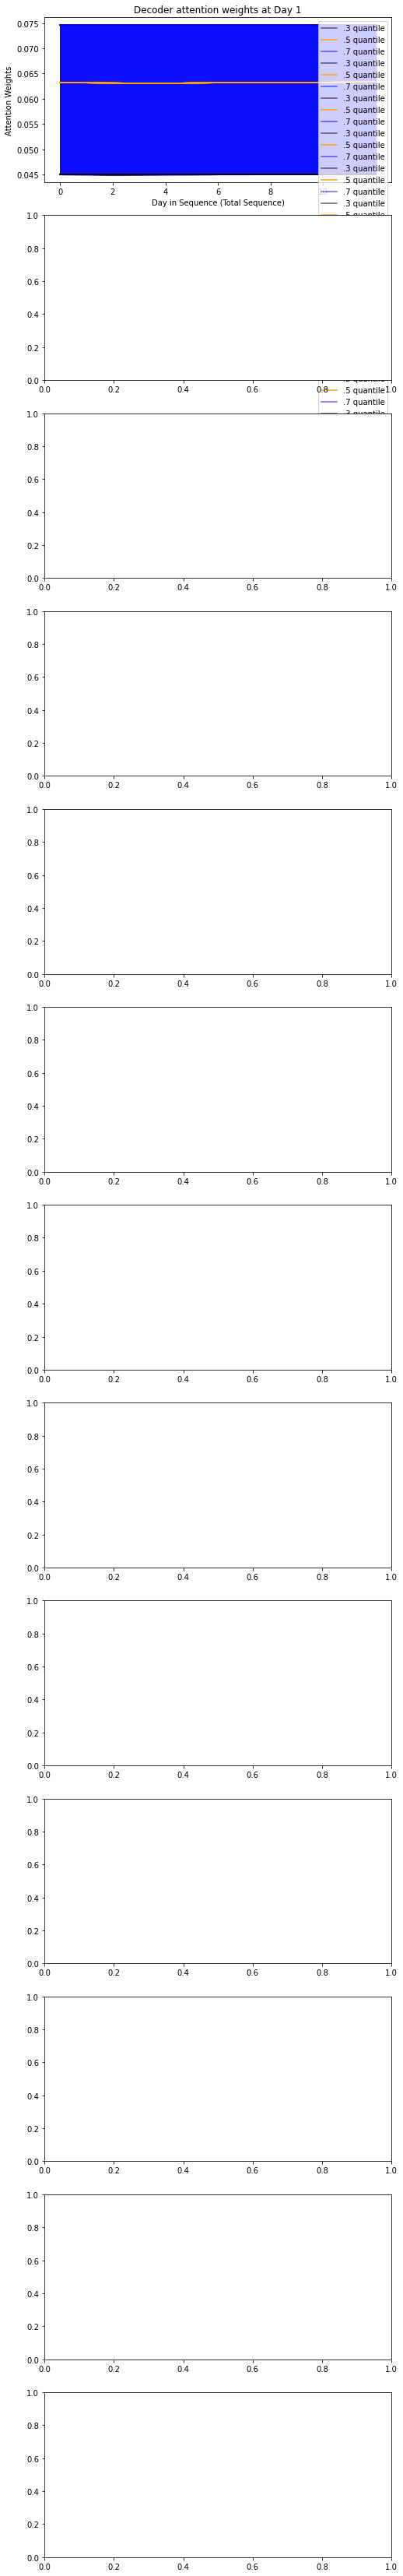

In [125]:
N = 15
X = np.arange(N)

fig, ax = plt.subplots(N, figsize=(8,60))
for day in range(N):
    ax[i].plot(hf_qt[0,:,i], color='black', label='.3 quantile', alpha=.6)
    ax[i].plot(hf_qt[1,:,i], color='orange', label='.5 quantile')
    ax[i].plot(hf_qt[2,:,i], color='blue', label='.7 quantile', alpha=.6)
    ax[i].fill_between(X, hf_qt[0,:,i], hf_qt[2,:,i], color='blue',alpha=.2)
    ax[i].set_title('Decoder attention weights at Day ' + str(i+1))
    ax[i].set_xlabel('Day in Sequence (Total Sequence)')
    ax[i].set_ylabel('Attention Weights')
    ax[i].legend()
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3)

In [162]:
test.keys()

dict_keys(['static_flags', 'historical_flags', 'future_flags', 'decoder_self_attn'])

In [163]:
sf = np.concatenate(test['static_flags'],axis=0)

In [164]:
sf.shape

(47795, 6)

In [165]:
sf = np.concatenate(test['static_flags'],axis=0)
sf_qt = np.quantile(sf, [.3,.5,.7], axis=0)

In [166]:
sf_qt

array([[0.00690171, 0.11338387, 0.16491792, 0.24429573, 0.21538001,
        0.14713883],
       [0.00731116, 0.12613718, 0.17602122, 0.26257953, 0.24546121,
        0.16164824],
       [0.00935048, 0.13644435, 0.19716279, 0.27158985, 0.2718074 ,
        0.16839281]])

In [182]:
N = 6
X = np.arange(N)

In [183]:
X

array([0, 1, 2, 3, 4, 5])

In [184]:
sf_qt

array([[0.00690171, 0.11338387, 0.16491792, 0.24429573, 0.21538001,
        0.14713883],
       [0.00731116, 0.12613718, 0.17602122, 0.26257953, 0.24546121,
        0.16164824],
       [0.00935048, 0.13644435, 0.19716279, 0.27158985, 0.2718074 ,
        0.16839281]])

NameError: name 'feature_list' is not defined

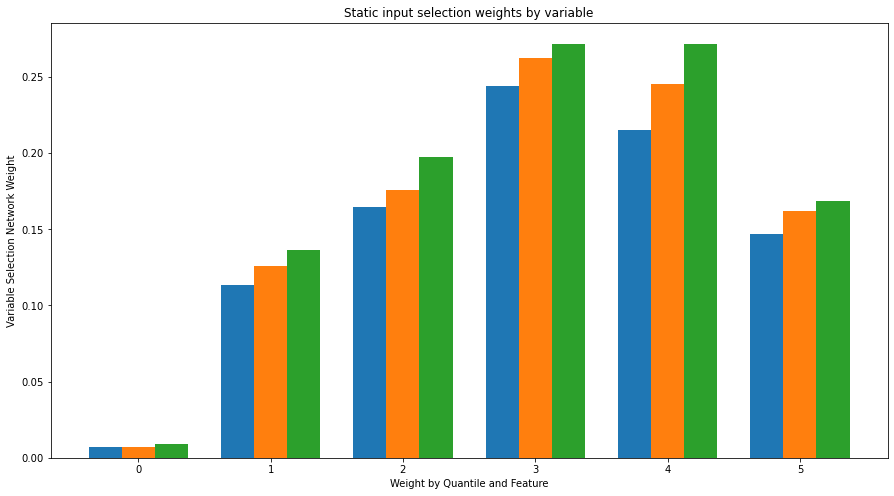

In [185]:
fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(X - width, sf_qt[0], width, label='0.3 quantile')
rects2 = ax.bar(X, sf_qt[1], width, label='0.5 quantile')
rects3 = ax.bar(X + width, sf_qt[2], width, label='0.7 quantile')
ax.set_ylabel('Variable Selection Network Weight')
ax.set_xlabel('Weight by Quantile and Feature')
ax.set_title('Static input selection weights by variable')
ax.set_xticks(X, feature_list)
ax.tick_params(labelrotation=45)
plt.legend()

In [169]:
ff = np.concatenate(test['future_flags'],axis=0)
print(ff.shape)

(47795, 15, 8)


In [167]:
ff = np.concatenate(test['future_flags'],axis=0)

ff = ff.mean(axis=1)

print(ff.shape)

ff_qt = np.quantile(ff, [.3,.5,.7], axis=0)

(47795, 8)


In [168]:
ff_qt.shape

(3, 8)